(cru-x0.25)=

# cru-x0.25 Example

## Dimensions

The CRU data has the following dimensions:

  - **time** (*datetime64[ns]*) - The time dimension for the data, monthly resolution.
  - **lat** (*float64*) - The latitude dimension for the data, 0.5° resolution.
  - **lon** (*float64*) - The longitude dimension for the data, 0.5° resolution.
  - **bnds** (*int64*) - The bounds dimension for the data, [0, 1] for each coordinate.

Data variables are organized with respect to those dimensions and can be queried by index, or by dimension.

## Example Data

In the following section, we explore some sample data from the CRU dataset.

### Reading the `.nc` file

We use [`xarray`](https://docs.xarray.dev), to read in the `.nc` file as an `xarray.Dataset` object.

In [1]:
import xarray as xr

In [2]:
data = xr.open_dataset("../climatology-tasmax-seasonal-mean_cru-x0.5_cru-ts4.07-historical_climatology_mean_1991-2020.nc")

### Examining the data

We can examine the data by printing the `xarray.Dataset` object.
Specifically, we can see the dimensions, coordinates, and data variables.

Further examination of the data can be done by viewing an individual coordinate, data variable, or the attributes of the dataset.

In [3]:
data

<xarray.Dataset>
Dimensions:                           (time: 4, lat: 360, lon: 720, bnds: 2)
Coordinates:
  * time                              (time) datetime64[ns] 1991-01-16 ... 19...
  * lat                               (lat) float32 -89.75 -89.25 ... 89.75
  * lon                               (lon) float32 -179.8 -179.2 ... 179.8
  * bnds                              (bnds) int32 0 1
Data variables:
    climatology-tasmax-seasonal-mean  (time, lat, lon) float32 ...
    lon_bnds                          (lon, bnds) float64 ...
    lat_bnds                          (lat, bnds) float64 ...
Attributes: (12/23)
    wb_truncation_label:   2
    wb_grid_label:         x0.5
    wb_period_label:       1991-2020
    wb_percentile_label:   mean
    wb_type_label:         climatology
    wb_model_label:        cru
    ...                    ...
    institution:           Data held at British Atmospheric Data Centre, RAL,...
    source:                Run ID = 2304141047. Data generated from:TMX deriv...
    history:               Fri 14 Apr 16:38:44 BST 2023 : User f098 : Program...
    references:            Information on the data is available at http://bad...
    comment:               Access to these data is available to any registere...
    contact:               support@ceda.ac.uk

In [4]:
data['time']

<xarray.DataArray 'time' (time: 4)>
array(['1991-01-16T00:00:00.000000000', '1991-04-16T00:00:00.000000000',
       '1991-07-16T00:00:00.000000000', '1991-10-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-01-16 1991-04-16 1991-07-16 1991-10-16
Attributes:
    typeConversion_op_ncl:  double converted to float
    long_name:              12 months of a climatological year
    axis:                   T
    standard_name:          12 months of a climatological year
    climatology_period:     1991-2020

In [5]:
data['lon_bnds']

<xarray.DataArray 'lon_bnds' (lon: 720, bnds: 2)>
[1440 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * bnds     (bnds) int32 0 1
Attributes:
    long_name:  longitude bounds

In [6]:
data.attrs

{'wb_truncation_label': 2,
 'wb_grid_label': 'x0.5',
 'wb_period_label': '1991-2020',
 'wb_percentile_label': 'mean',
 'wb_type_label': 'climatology',
 'wb_model_label': 'cru',
 'wb_variant_label': 'ts4.07',
 'wb_scenario_label': 'historical',
 'wb_statistic_label': 'mean',
 'wb_aggregation_label': 'seasonal',
 'wb_variable_label': 'tasmax',
 'wb_product_label': 'climatology',
 'wb_collection_label': 'cru-x0.5',
 'wb': ' \nwb_access_citation = Please acknowledge data source as :\n   Climatic Research Unit (University of East Anglia) and Met Office\n   accessed through: World Bank Climate Change Knowledge Portal : https://climateknowledgeportal.worldbank.org \nwb_data_license_comment = data available under UK Open Government License: https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/\nwb_data_comment = Processed CRU data by WB; RAW-data contact: support@ceda.ac.uk\nwb_scientific_reference = Harris, I., Osborn, T.J., Jones, P. et al.\n   Version 4 of the CRU TS mo

### Visualizing the data

We can visualize the primary data variable in the example dataset, *climatology-tasmax-seasonal-mean* (if `matplotlib` is installed), by using the built-in `.plot()` method of the `xarray.DataArray` object.

If we just call the `.plot()` method, we get a default plot of the data, which in this case reduces the dimensionality of the data from 3-D (time, lat, lon) to 1-D, by generating a bar plot of the mean value of the data variable over the entire time period for each latitude and longitude.

(array([ 1161.,  7122., 11847., 19200., 25246., 35081., 37935., 46660.,
        75466.,  9962.]),
 array([-43.06625748, -34.18603897, -25.30581665, -16.42559814,
         -7.54537725,   1.33484268,  10.2150631 ,  19.09528351,
         27.97550201,  36.85572433,  45.73594284]),
 <BarContainer object of 10 artists>)

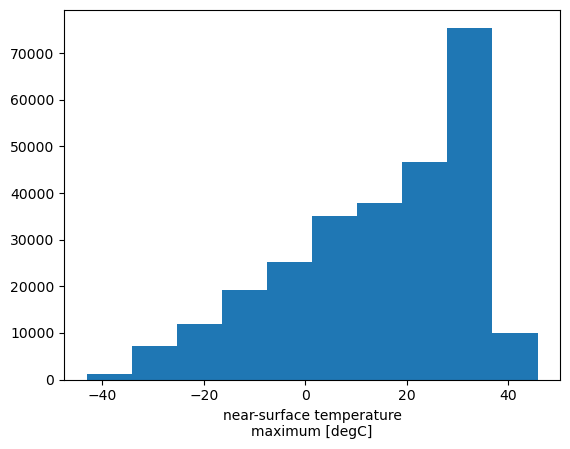

In [7]:
# visualize the data
data['climatology-tasmax-seasonal-mean'].plot()

If we want to view the data as a 2-D surface plotted at a specific instance in time, we can use the `.plot()` method to specify the time index we want to plot.
Because we are working with a `.nc` file that has been loaded as an `xarray.Dataset` object, we can use the `.sel()` method to select the time index we want to plot directly, we do not need to calculate or search for the index value.

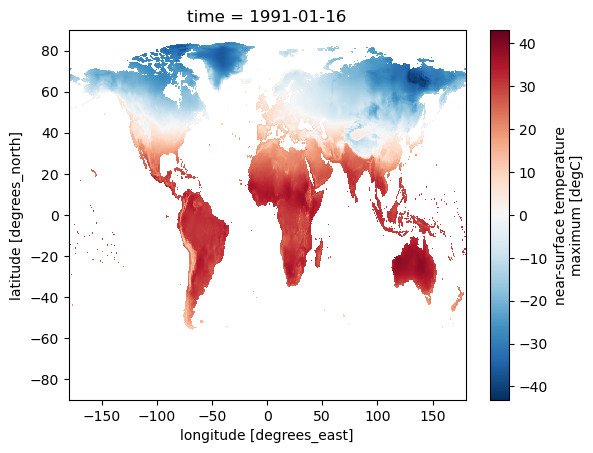

In [8]:
# surface plot of the data
data['climatology-tasmax-seasonal-mean'].sel(time='1991-01-16').plot()